In [107]:
# NUMPY
import numpy as np

# MATPLOTLIB
import matplotlib.pyplot as plt
plt.style.context('dark_background')
%matplotlib inline 
from matplotlib import rc
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Computer Modern Roman']})
params = {'axes.labelsize': 8, # 12
          'font.size': 8, # 12
          'legend.fontsize': 8, # 12
          'xtick.labelsize': 8, # 10
          'ytick.labelsize': 8, # 10
          'text.usetex': True,
          'figure.figsize': (16, 6)}
plt.rcParams.update(params)

# SEABORN 
import seaborn as sns
sns.set_context("poster")
sns.set_style("ticks")

# SKLEARN 
from sklearn.metrics import pairwise_distances

# POT
import ot
from ot import sinkhorn, emd
# from ot.bregman import sinkhorn, greenkhorn

# PATH 
import sys
path_files = '/Users/mzalaya/PycharmProjects/OATMIL/oatmilrouen/'
sys.path.insert(0, path_files) 

# GREENKHORN 
# from greenkhorn.sinkhorn import sinkhorn as sinkhgreen
# SCREENKHORN
from screenkhorn.screenkhorn import Screenkhorn
# np.random.seed(3946)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Data generation

In [142]:
n_1 = 200# nb samples
n_2 = 200
mu_s = np.array([0, 0])
cov_s = np.array([[1, 0], [0, 1]])

mu_t = np.array([4, 4])
cov_t = np.array([[1, -.8], [-.8, 1]])

xs = ot.datasets.make_2D_samples_gauss(n_1, mu_s, cov_s)
xt = ot.datasets.make_2D_samples_gauss(n_2, mu_t, cov_t)

a = np.ones((n_1,)) / n_1
b = np.ones((n_2,)) / n_2  # uniform distribution on samples

# loss matrix
M = ot.dist(xs, xt)
M /= M.max()
reg = 0.01

K = np.exp(-M/reg)

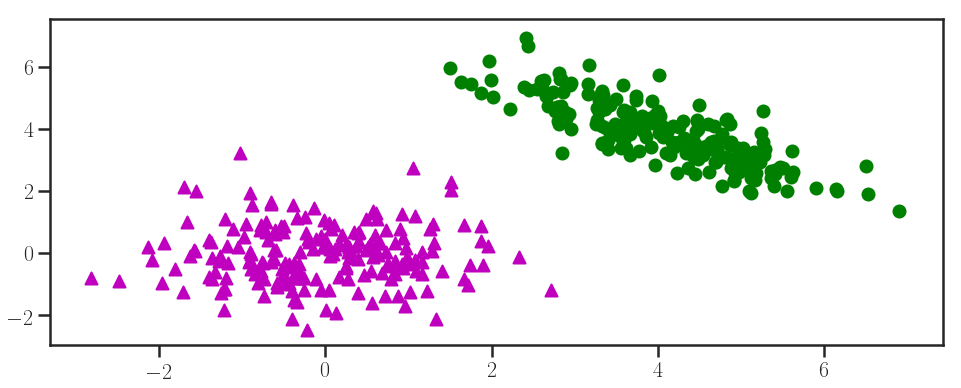

In [143]:
plt.scatter(xs[:,0], xs[:,1], marker='^', c='m')
plt.scatter(xt[:,0], xt[:,1], marker='o', c='g');

## Sinkhorn's algorithm from POT

In [144]:
P_sink = sinkhorn(a, b, M, reg, log=True)

In [145]:
# Print P^star, u_sink = e^{u^star}, v_sink = e^{v^star}
P_star = P_sink[0]
outputs_dict = P_sink[1]
exp_u_star = outputs_dict['u']
exp_v_star = outputs_dict['v']

## Some norms of $e^{u^\star}$ and $e^{v^\star}$ 

In [146]:
## L_2 norm
norm2exp_u_star = np.linalg.norm(exp_u_star, 2)
norm2exp_v_star  = np.linalg.norm(exp_v_star, 2)

norm2exp_u_star, norm2exp_v_star

(1.8378391131219417e+19, 340378862179.60297)

In [147]:
## L_1 norm
norm1exp_u_star = np.linalg.norm(exp_u_star, 1)
norm1exp_v_star  = np.linalg.norm(exp_v_star, 1)

norm1exp_u_star, norm1exp_v_star

(1.997840517369274e+19, 688325079050.1736)

In [148]:
## L_infty norm 
norminftyexp_u_star = np.max(exp_u_star)
norminftyexp_v_star = np.max(exp_v_star)

norminftyexp_u_star, norminftyexp_v_star

(1.830984438851833e+19, 212457938848.40985)

In [149]:
## L_-infty norm 
norm_inftyexp_u_star = np.min(exp_u_star)
norm_inftyexp_v_star = np.min(exp_v_star)

norm_inftyexp_u_star, norm_inftyexp_v_star

(4.889907147679012e-07, 0.014661102733973535)

In [150]:
norm_min1_exp_u_star = np.linalg.norm(exp_u_star, -1)
norm_min1_exp_v_star = np.linalg.norm(exp_v_star, -1)

norm_min1_exp_u_star, norm_min1_exp_v_star

(2.3944312474778343e-07, 0.014429025877859929)

### Plots of $e^{u^\star}$ and $e^{v^\star}$ 

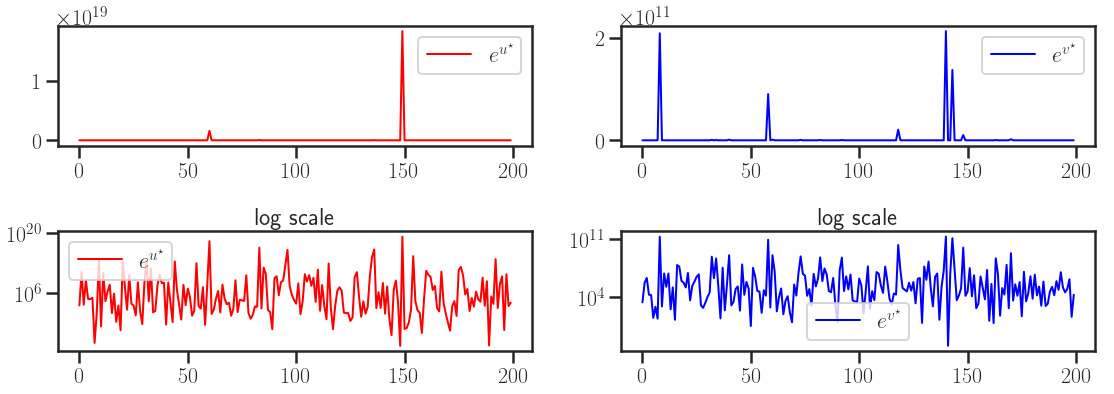

In [151]:
figure, axes= plt.subplots(nrows=2, ncols=2)

axes[0,0].plot(exp_u_star, linewidth=2, color='r', label=r'$e^{u^\star}$')
axes[0,1].plot(exp_v_star, linewidth=2, color='b', label=r'$e^{v^\star}$')
axes[0,0].legend()
axes[0,1].legend();

axes[1,0].semilogy(exp_u_star, linewidth=2, color='r', label=r'$e^{u^\star}$')
axes[1,1].semilogy(exp_v_star, linewidth=2, color='b', label=r'$e^{v^\star}$')
axes[1,0].legend()
axes[1,0].set_title("log scale")
axes[1,1].set_title("log scale")
axes[1,1].legend();
plt.subplots_adjust(hspace=.5)
plt.tight_layout()

## Search of the normalization constant 

In [154]:
# C = norm2exp_v_star/norm2exp_u_star
# C

# C = norm1exp_v_star / norm1exp_u_star
# C = norm_inftyexp_u_star / norm1exp_v_star
# C = norm_inftyexp_u_star
C_K = np.exp(- np.log(np.exp(- np.max(K))*np.min(np.hstack([a,b]))))
#C = C*norm_inftyexp_u_star
# C_ahmed = np.sqrt((exp_u_star/exp_v_star).mean()) # Ahmed
C_ = (np.sum(exp_u_star**2) / np.sum(exp_v_star**2))**(1/4)

C = (np.linalg.norm(exp_u_star)**2/ np.linalg.norm(exp_v_star)**2)**(1/4)

# print(C, C_K)
#print(np.linalg.norm((u_star/C_ahmed - v_star*C_ahmed), 1))
#print(np.linalg.norm((u_star/C - v_star*C), 1))
#C = C * C_K
#C = C_K
C, C_K 
C_K
C_KK = np.exp(1./(np.exp(-np.max(-M)/reg)*np.min(np.hstack([a,b]))))
C_K = 1.

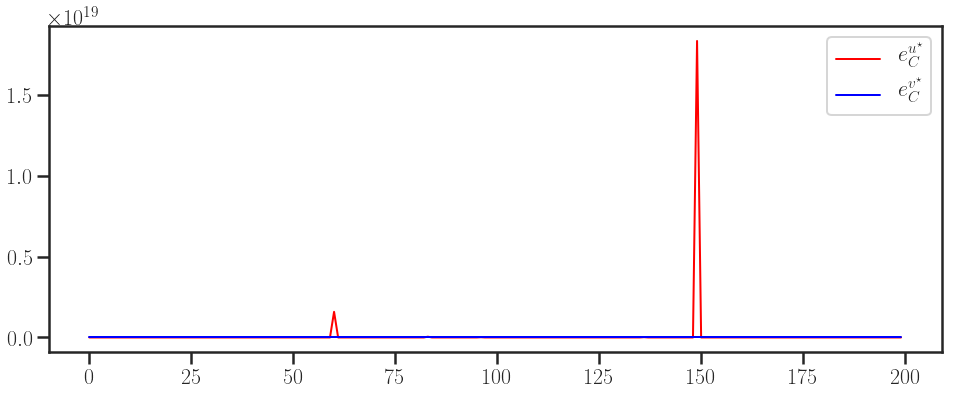

In [161]:
exp_u_star_C = exp_u_star*C_K  #norm_inftyexp_v_star #norm_inftyexp_u_star, norm_min1_exp_u_star, 
exp_v_star_C = exp_v_star/C_K
# exp_u_star_C = exp_u_star*100/C  #norm_inftyexp_v_star #norm_inftyexp_u_star, norm_min1_exp_u_star, 
# exp_v_star_C = exp_v_star*C/100 #norm_inftyexp_v_star)

# figure, axes= plt.subplots(ncols=2)
# axes[0].semilogy(exp_u_star_C, linewidth=2, color='r', label=r'$e^{u^\star}_C$')
 #axes[1].semilogy(exp_v_star_C, linewidth=2, color='b', label=r'$e^{v^\star}_C$')
 #axes[0].legend()
#axes[1].legend();
plt.plot(exp_u_star_C, linewidth=2, color='r', label=r'$e^{u^\star}_C$')
plt.plot(exp_v_star_C, linewidth=2, color='b', label=r'$e^{v^\star}_C$')
plt.legend();

### Plots of $u^\star$ and $v^\star$

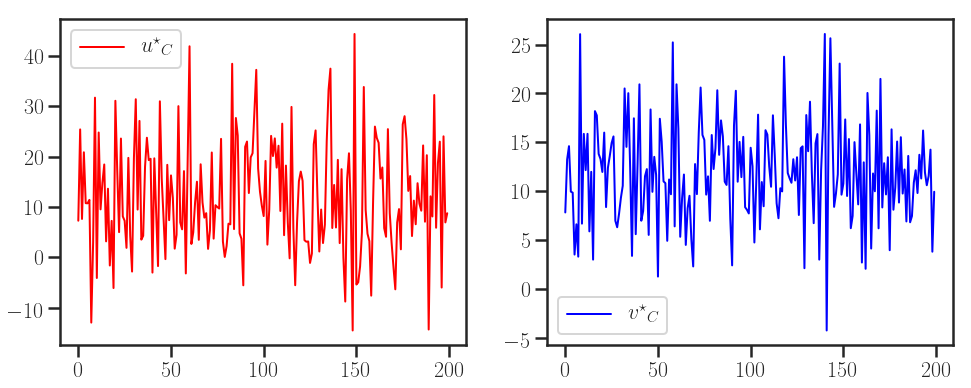

In [162]:
u_star_C = np.log(exp_u_star_C)
v_star_C = np.log(exp_v_star_C)

figure, axes= plt.subplots(ncols=2)
axes[0].plot(u_star_C, linewidth=2, color='r', label=r'${u^\star}_C$')
axes[1].plot(v_star_C, linewidth=2, color='b', label=r'${v^\star}_C$')
axes[0].legend()
axes[1].legend();

epsilon = 0.0


/Users/mzalaya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


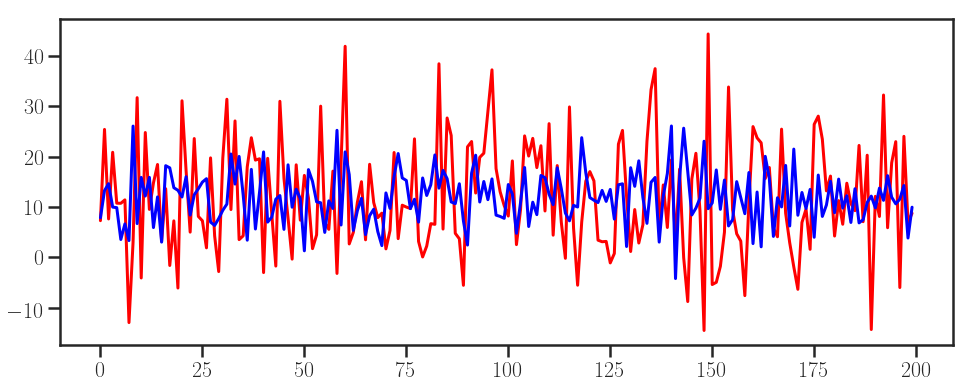

In [163]:
log_epsilon = -np.inf
epsilon = np.exp(log_epsilon)
print('epsilon = %s' %epsilon)
plt.plot(u_star_C, 'r')
plt.plot(v_star_C, 'b')
plt.axhline(y=np.log(epsilon));

### Choosing of the intervals $I_u$ and $J_v$

In [164]:
I = np.where(exp_u_star_C >= epsilon)[0].tolist()
Ic = np.where(exp_u_star_C < epsilon)[0].tolist()
len(I), len(Ic)

(200, 0)

In [165]:
J = np.where(exp_v_star_C >= epsilon)[0].tolist()
Jc = np.where(exp_v_star_C < epsilon)[0].tolist()
len(J), len(Jc)

(200, 0)

# `screenkhorn`

In [166]:
screenkhorn = Screenkhorn(a, b, M, reg, epsilon)

## Projected Gradient Descent 

In [174]:
u0_epsilon = np.zeros(n_1)
v0_epsilon = np.zeros(n_2)
proj_grad_ord = screenkhorn.projected_grad(None, None, I, J, max_iter_backtracking=30,
                                           step_size=60, max_iter=1000, tol=1e-14, verbose=False)

 44%|████▎     | 435/1000 [00:02<00:02, 201.93it/s]

Achieved relative tolerance at iteration 453


### Curve of the objective function

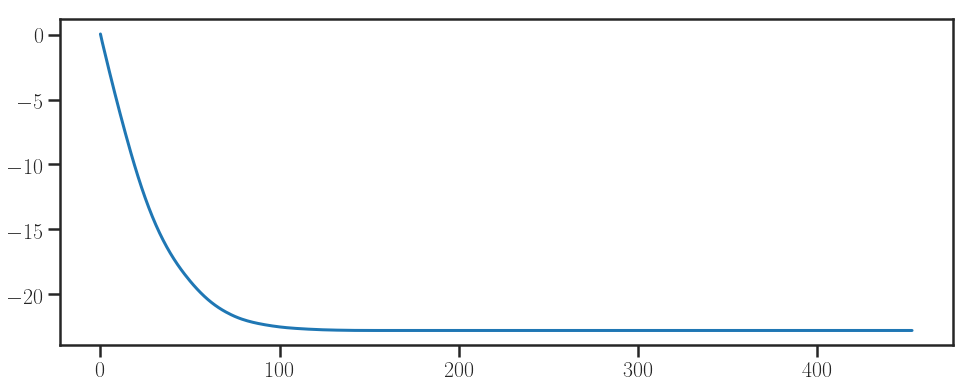

In [175]:
#plt.yscale("log")
obj_ord = proj_grad_ord["trace_obj"]
plt.plot(obj_ord);

### Sort of the solution by `screenkhorn` 

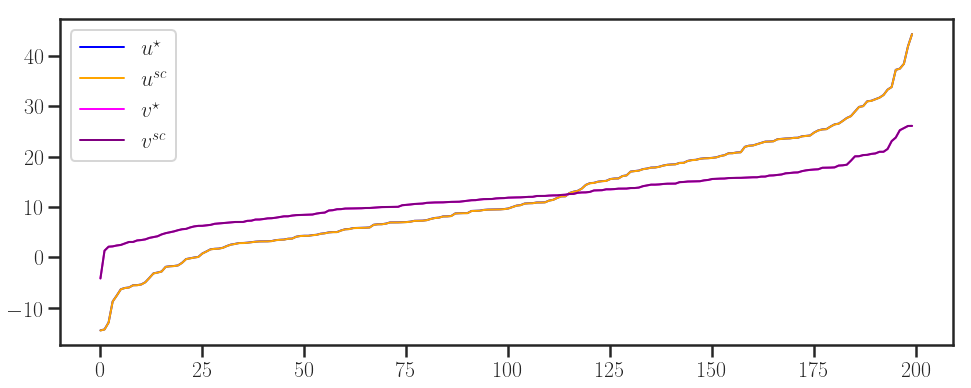

In [176]:
plt.plot(np.sort(u_star_C), 'blue', linewidth=2, label =r'${u^\star}$')
plt.plot(np.sort(proj_grad_ord["usc"]), 'orange', linewidth=2, label =r'${u^{{sc}}}$')
plt.plot(np.sort(v_star_C), 'magenta', linewidth=2, label =r'${v^\star}$')
plt.plot(np.sort(proj_grad_ord["vsc"]), 'purple', linewidth=2, label =r'${v^{{sc}}}$')
# plt.axhline(y =np.log(epsilon), linewidth=, color='r', label=r'$\log(\varepsilon)$');
plt.legend(loc='best');
# plt.title(r'log-potentials vectors of sinkhorn and screenkhorn with ${maxIter}=10000,\,tol=1e-19$')
plt.savefig(r'Potentials vectors of sinkhorn and screenkhorn.pdf', bbox_inches='tight')
plt.show();

In [177]:
# sinkhorn
P_star_C = np.diag(np.exp(u_star_C)) @ K @ np.diag(np.exp(v_star_C)) 
a_star_C = P_star_C @ np.ones(n_2)
b_star_C = P_star_C.T @ np.ones(n_1)

# screenkhorn via pgd
usc_ord = proj_grad_ord["usc"]
vsc_ord = proj_grad_ord["vsc"]
P_sc_ord = np.diag(np.exp(usc_ord)) @ K @ np.diag(np.exp(vsc_ord))
a_sc_ord = P_sc_ord @ np.ones(n_2)
b_sc_ord = P_sc_ord.T @ np.ones(n_1)

print("sum of the marginals in sinkhorn are: %s, \t %s" %(sum(a_star_C), sum(b_star_C)))
print("\t")
print("sum of the marginals in screenkhorn are: %s, \t %s" %(sum(a_sc_ord), sum(b_sc_ord)))
print("\t")
print("Difference in sinkhorn: %s \t %s:" %(abs(1 - sum(a_star_C)), abs(1 - sum(b_star_C))))
print("\t")
print("Difference in screenkhorn: %s \t  %s:" %(abs(1 - sum(a_sc_ord)), abs(1 - sum(b_sc_ord))))
print("\t")
print("Frobenius norm of %s ",  np.linalg.norm(P_star_C - P_sc_ord,'fro'))
print('\t')
print("Max norm of %s ",  abs(P_star_C - P_sc_ord).max())

sum of the marginals in sinkhorn are: 1.0000000000000007, 	 0.9999999999999999
	
sum of the marginals in screenkhorn are: 1.0, 	 1.0000000000000002
	
Difference in sinkhorn: 6.661338147750939e-16 	 1.1102230246251565e-16:
	
Difference in screenkhorn: 0.0 	  2.220446049250313e-16:
	
Frobenius norm of %s  2.5908182567927174e-06
	
Max norm of %s  6.017927108325528e-07


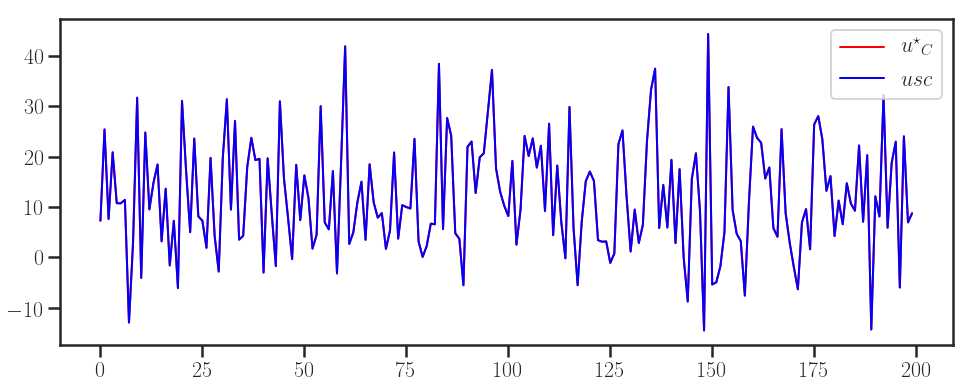

In [178]:
# figure, axes= plt.subplots(nrows=2)
# axes[0].plot(u_star_C, linewidth=2, color='r', label=r'${u^\star}_C$')
# axes[1].plot(usc_ord, linewidth=2, color='b', label=r'$usc$')
# axes[0].legend()
# axes[1].legend();
# plt.subplots_adjust(hspace=.5)

plt.plot(u_star_C, linewidth=2, color='r', label=r'${u^\star}_C$')
plt.plot(usc_ord, linewidth=2, color='b', label=r'$usc$')
plt.legend()
plt.legend();

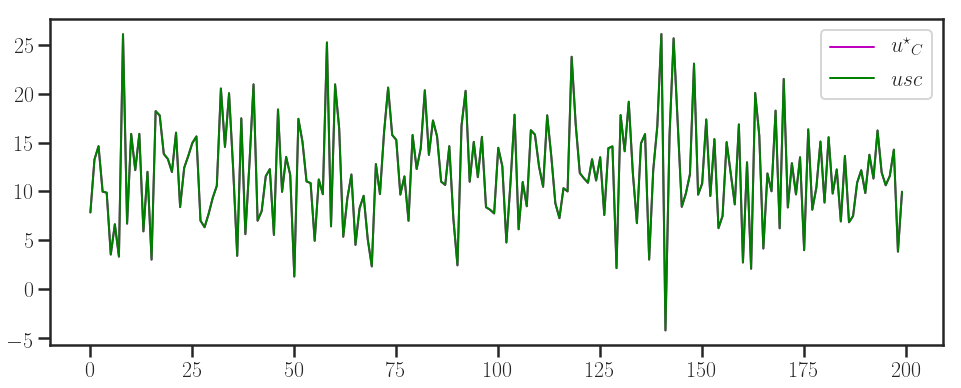

In [179]:
# figure, axes= plt.subplots(nrows=2)
# axes[0].plot(v_star_C, linewidth=2, color='g', label=r'${v^\star}_C$')
# axes[1].plot(vsc_ord, linewidth=2, color='m', label=r'$vsc$')
# axes[0].legend()
# axes[1].legend();

plt.plot(v_star_C, linewidth=2, color='m', label=r'${u^\star}_C$')
plt.plot(vsc_ord, linewidth=2, color='g', label=r'$usc$')
plt.legend()
plt.legend();

## Block Projected Gradient Decsent

In [180]:
proj_grad_alt = screenkhorn.block_projected_grad(None, None, I, J, max_iter_backtracking=10,
                                       step_size=45., max_iter=1000, tol=1e-10, verbose=False)

100%|██████████| 1000/1000 [00:07<00:00, 139.99it/s]


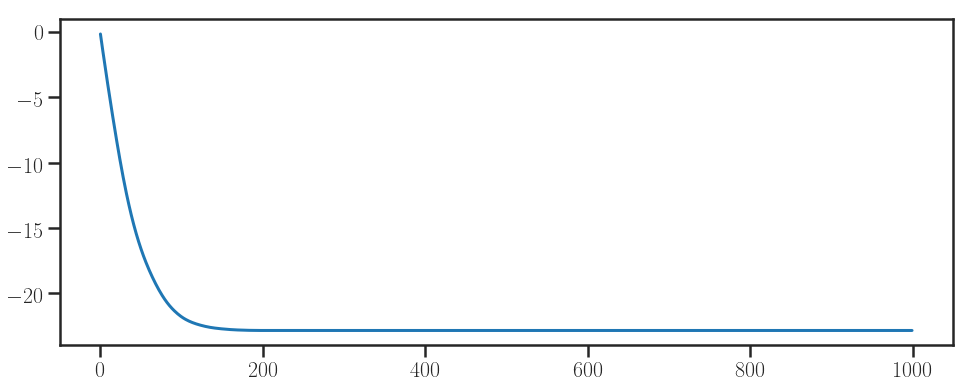

In [181]:
#plt.yscale("log")
obj_alt= proj_grad_alt["trace_obj"]
plt.plot(obj_alt);

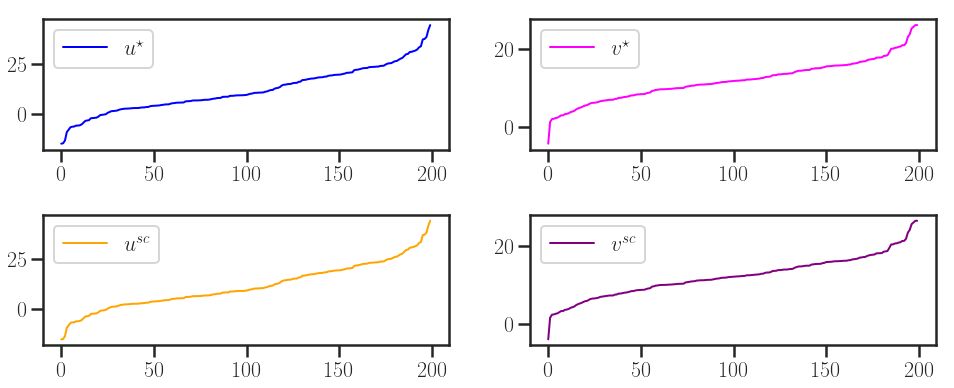

In [182]:
figure, axes= plt.subplots(nrows=2, ncols=2)

axes[0,0].plot(np.sort(u_star_C), 'blue', linewidth=2, label =r'${u^\star}$')
axes[0,1].plot(np.sort(v_star_C), 'magenta', linewidth=2, label =r'${v^\star}$')

axes[1,0].plot(np.sort(proj_grad_alt["usc"]), 'orange', linewidth=2, label =r'${u^{{sc}}}$')
axes[1,1].plot(np.sort(proj_grad_alt["vsc"]), 'purple', linewidth=2, label =r'${v^{{sc}}}$')
axes[0,0].legend();
axes[0,1].legend();
axes[1,0].legend();
axes[1,1].legend();
plt.savefig(r'Potentials vectors of sinkhorn and screenkhorn.pdf', bbox_inches='tight')
plt.subplots_adjust(hspace=.5)

In [183]:
# screenkhorn via pgd
usc_alt = proj_grad_alt["usc"]
vsc_alt = proj_grad_alt["vsc"]
P_sc_alt = np.diag(np.exp(usc_alt)) @ K @ np.diag(np.exp(vsc_alt))
a_sc_alt = P_sc_alt @ np.ones(n_2)
b_sc_alt  = P_sc_alt.T @ np.ones(n_1)

print("sum of the marginals in sinkhorn are: %s, \t %s" %(sum(a_star_C), sum(b_star_C)))
print("\t")
print("sum of the marginals in screenkhorn are: %s, \t %s" %(sum(a_sc_alt), sum(b_sc_alt)))
print("\t")
print("Difference in sinkhorn: %s \t %s:" %(abs(1 - sum(a_star_C)), abs(1 - sum(b_star_C))))
print("\t")
print("Difference in screenkhorn: %s \t  %s:" %(abs(1 - sum(a_sc_alt)), abs(1 - sum(b_sc_alt))))

print("\t")
print("Frobenius norm of %s ",  np.linalg.norm(P_star_C - P_sc_alt,'fro'))
print('\t')
print("Max norm of %s ",  abs(P_star_C - P_sc_alt).max())

sum of the marginals in sinkhorn are: 1.0000000000000007, 	 0.9999999999999999
	
sum of the marginals in screenkhorn are: 1.0000000000000002, 	 1.0000000000000002
	
Difference in sinkhorn: 6.661338147750939e-16 	 1.1102230246251565e-16:
	
Difference in screenkhorn: 2.220446049250313e-16 	  2.220446049250313e-16:
	
Frobenius norm of %s  2.590779671349965e-06
	
Max norm of %s  6.017984473852787e-07


In [184]:
usc_alt = proj_grad_alt["usc"]
vsc_alt = proj_grad_alt["vsc"]

# figure, axes= plt.subplots(nrows=2)
# axes[0].plot(u_star_C, linewidth=2, color='r', label=r'${u^\star}_C$')
# axes[1].plot(usc_ord, linewidth=2, color='b', label=r'$usc$')
# axes[0].legend()
# axes[1].legend();
# plt.subplots_adjust(hspace=.5)

In [185]:
# figure, axes= plt.subplots(nrows=2)

# axes[0].plot(v_star_C, linewidth=2, color='g', label=r'${v^\star}_C$')
# axes[1].plot(vsc_alt, linewidth=2, color='m', label=r'$vsc$')
# axes[0].legend()
# axes[1].legend();

## Accelerated Projected Gradient Descent

In [188]:
proj_grad_acc = screenkhorn.accelerated_projected_grad(np.zeros(n_1), np.zeros(n_2), I, J, 
                                                       max_iter_backtracking=70,
                                         step_size=50., max_iter=1000, tol=1e-10, verbose=False)

100%|██████████| 1000/1000 [00:30<00:00, 16.78it/s]


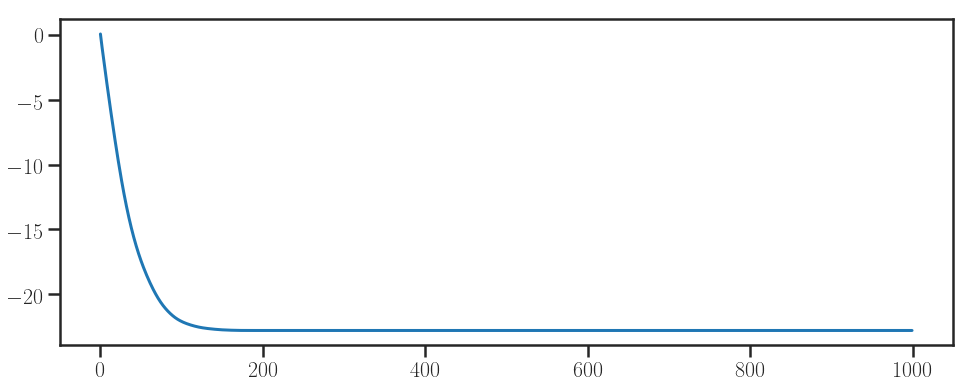

In [189]:
#plt.yscale("log")
obj_acc= proj_grad_acc["trace_obj"]
plt.plot(obj_acc);

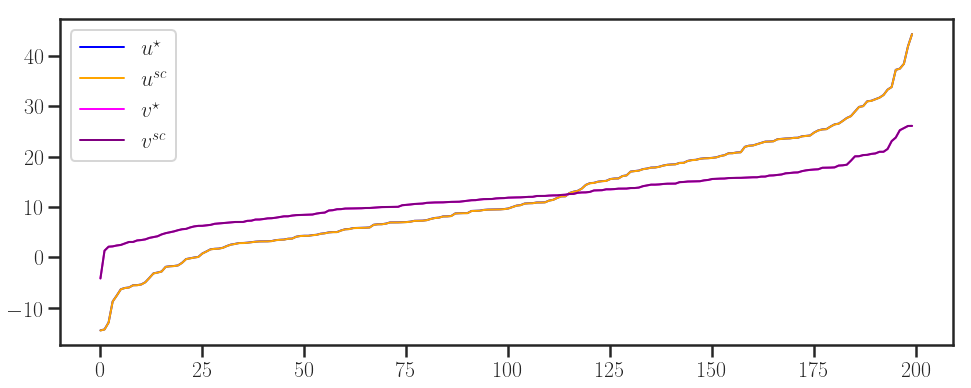

In [190]:
plt.plot(np.sort(u_star_C), 'blue', linewidth=2, label =r'${u^\star}$')
plt.plot(np.sort(proj_grad_acc["usc"]), 'orange', linewidth=2, label =r'${u^{{sc}}}$')
plt.plot(np.sort(v_star_C), 'magenta', linewidth=2, label =r'${v^\star}$')
plt.plot(np.sort(proj_grad_acc["vsc"]), 'purple', linewidth=2, label =r'${v^{{sc}}}$')
# plt.axhline(y =np.log(epsilon), linewidth=, color='r', label=r'$\log(\varepsilon)$');
plt.legend(loc='best');
# plt.title(r'log-potentials vectors of sinkhorn and screenkhorn with ${maxIter}=10000,\,tol=1e-19$')
plt.savefig(r'Potentials vectors of sinkhorn and screenkhorn.pdf', bbox_inches='tight')
plt.show();

In [191]:
# screenkhorn via pgd
usc_acc = proj_grad_acc["usc"]
vsc_acc = proj_grad_acc["vsc"]
P_sc_acc = np.diag(np.exp(usc_acc)) @ K @ np.diag(np.exp(vsc_acc))
a_sc_acc = P_sc_acc @ np.ones(n_2)
b_sc_acc  = P_sc_acc.T @ np.ones(n_1)

print(sum(a_star_C), sum(b_star_C))
print("\t")
print(sum(a_sc_acc), sum(b_sc_acc))
print("\n")
print(abs(1 - sum(a_star_C)), abs(1 - sum(b_star_C)))
print("\t")
print(abs(1 - sum(a_sc_acc)), abs(1 - sum(b_sc_acc)))

print("\t")
print("Frobenius norm of %s ",  np.linalg.norm(P_star_C - P_sc_acc,'fro'))
print('\t')
print("Max norm of %s ",  abs(P_star_C - P_sc_acc).max())

1.0000000000000007 0.9999999999999999
	
0.9999999999999997 0.9999999999999999


6.661338147750939e-16 1.1102230246251565e-16
	
3.3306690738754696e-16 1.1102230246251565e-16
	
Frobenius norm of %s  2.5908287730462615e-06
	
Max norm of %s  6.017911474134538e-07


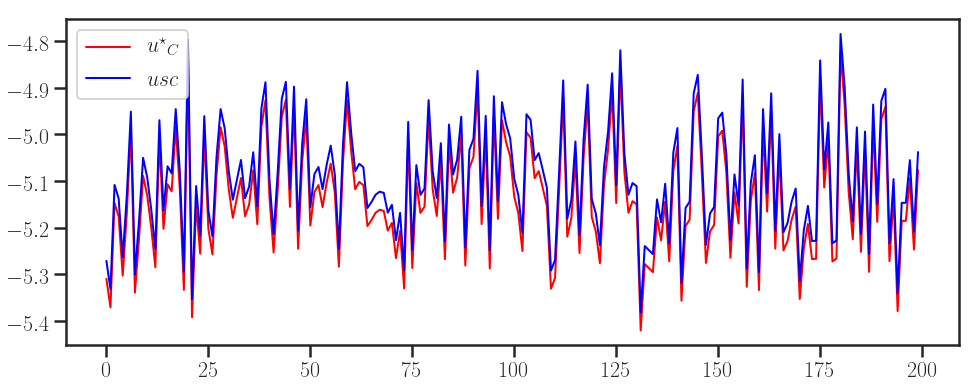

In [104]:
usc_alt = proj_grad_acc["usc"]
vsc_alt = proj_grad_acc["vsc"]

# figure, axes= plt.subplots(nrows=2)
# axes[0].plot(u_star_C, linewidth=2, color='r', label=r'${u^\star}_C$')
# axes[1].plot(usc_ord, linewidth=2, color='b', label=r'$usc$')
# axes[0].legend()
# axes[1].legend();
# plt.subplots_adjust(hspace=.5)

plt.plot(u_star_C, linewidth=2, color='r', label=r'${u^\star}_C$')
plt.plot(usc_acc, linewidth=2, color='b', label=r'$usc$')
plt.legend()
plt.legend();

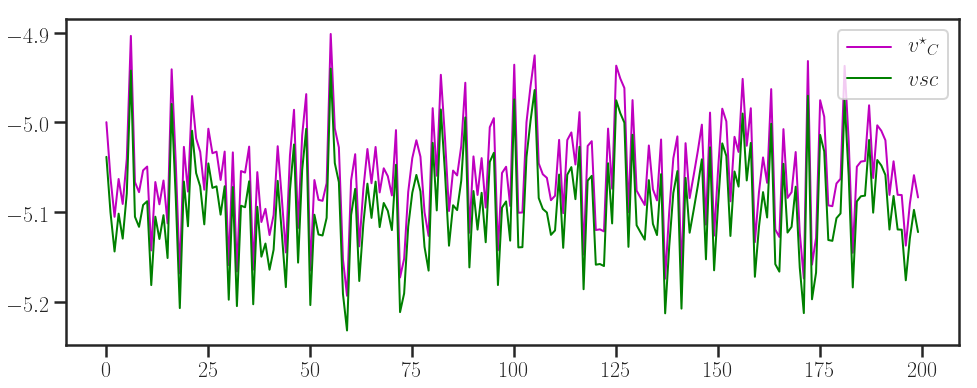

In [106]:
# figure, axes= plt.subplots(nrows=2)
# axes[0].plot(v_star_C, linewidth=2, color='g', label=r'${v^\star}_C$')
# axes[1].plot(vsc_alt, linewidth=2, color='m', label=r'$vsc$')
# axes[0].legend()
# axes[1].legend();

plt.plot(v_star_C, linewidth=2, color='m', label=r'${v^\star}_C$')
plt.plot(vsc_acc, linewidth=2, color='g', label=r'$vsc$')
plt.legend()
plt.legend();